In [1]:
import tensorflow as tf

In [2]:
#importing mnist
mnist= tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

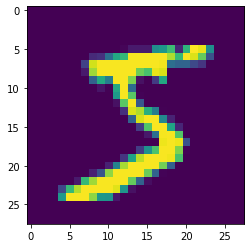

In [6]:
plt.imshow(x_train[0])

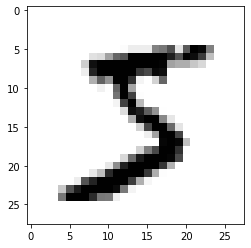

In [7]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

Normalization

In [8]:
#before normalization
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Preprocessing

In [ ]:
#Normalizing the data

In [ ]:
#Preprocessing steps

In [9]:
x_train=tf.keras.utils.normalize(x_train,axis=1)

In [10]:
x_test=tf.keras.utils.normalize(x_test,axis=1)

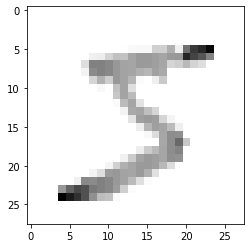

In [11]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

After Normalization

In [12]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print(y_train[0])

5


Resizing image to make it suitable to apply convolution operation

In [14]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print('Training sample dimension',x_trainr.shape)
print('Testing sample dimension',x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network

training on 60,000 samples of mnist handwritten dataset

In [ ]:
pip install keras

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [16]:
model = Sequential()

In [17]:
##1st Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##2nd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##3rd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
          

##Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))
          

##Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [19]:
print("Total Training Samples =",len(x_trainr))

Total Training Samples = 60000


In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [21]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 86s 63ms/step - loss: 0.3229 - accuracy: 0.8988 - val_loss: 0.1484 - val_accuracy: 0.9551
Epoch 2/5
1313/1313 [==============================] - 93s 71ms/step - loss: 0.1025 - accuracy: 0.9689 - val_loss: 0.0997 - val_accuracy: 0.9692
Epoch 3/5
1313/1313 [==============================] - 93s 71ms/step - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0802 - val_accuracy: 0.9756
Epoch 4/5
1313/1313 [==============================] - 83s 63ms/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0708 - val_accuracy: 0.9786
Epoch 5/5
1313/1313 [==============================] - 79s 61ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0679 - val_accuracy: 0.9802


Evaluating on test set

In [22]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0650 - accuracy: 0.9810
Test Loss on 10,000 samples 0.06503219902515411
Validation Accuracy on 10,000 test samples 0.9810000061988831


In [23]:
prediction= model.predict(x_testr)

In [ ]:
from keras.models import model_from_json

In [ ]:
#serialize model to JSON
model_json = model.to_json()
with open ("model.json","w") as json_file:
    json_file.write(model_json)
    #serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [24]:
print (np.argmax(prediction[0]))

7


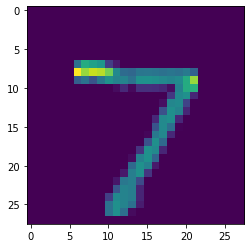

In [25]:
plt.imshow(x_test[0])

In [26]:
print(np.argmax(prediction[999]))

9


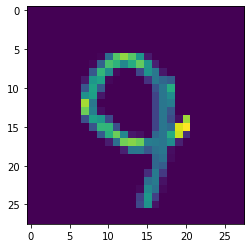

In [27]:
plt.imshow(x_test[999])

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

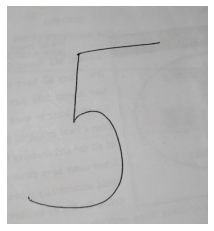

In [101]:
img = cv.imread("Downloads\\five.jpg")[:, :, ::-1]
plt.axis("off")
plt.imshow(img)

In [103]:
img.shape

(2541, 2343, 3)

In [104]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [105]:
gray.shape

(2541, 2343)

In [106]:
ret,thresh= cv.threshold(gray,150,255,cv.THRESH_BINARY_INV)

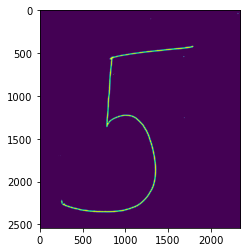

In [107]:
plt.imshow(thresh)

In [108]:
resized=cv.resize(thresh,(28,28),interpolation= cv.INTER_AREA)

In [109]:
resized.shape

(28, 28)

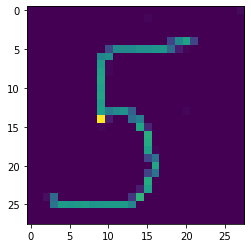

In [110]:
plt.imshow(resized)

In [111]:
newing= tf.keras.utils.normalize(resized,axis=1)

In [112]:
newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [113]:
newing.shape

(1, 28, 28, 1)

In [114]:
prediction =model.predict(newing)

In [115]:
print(np.argmax(prediction))

5


# Webcam

In [155]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


cap= cv2.VideoCapture(0)
#cap.set(cv.CAP_PROP_FPS, 170)

if not cap.isOpened():
  cap=cv2.VideoCapture(1)
if not cap.isOpened():
  raise IOError ("Cannot open webcam")

text = "Some text in a box"
#getting the widht and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#making the coords of the box with a smallpadding of two pixels
box_coords = ((text_offset_x, text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height - 2))
#cv.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv.FILLED)
#cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale= font_scale, color= (0,0,0), thickness= 1)
cntr=0;
while True:
    ret, frame = cap.read()
    cntr = cntr + 1;
    if((cntr%20)==0):
    
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret,thresh= cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
        resized = cv2.resize(thresh,(28,28), interpolation = cv2.INTER_AREA)
        newimg= tf.keras.utils.normalize(resized, axis = 1)
        newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(newimg)
        status = np.argmax(predictions)
    
        print(status)
        print(type(status))

    x1, y1, w1, h1 = 0,0,175,75
  #draw black background rectangle
    cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,255,0), -1)
  #Add text 
    cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
    

    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #print(model.empty())
    #faces= model.detectMultiScale(gray,1.1,4)

  #Draw a rectangle around the faces
    #for (x,y,w,h) in faces:
    #cv2.rectangle (frame, (x1,y1),(x1+w1, y1+h1), (0,255,0),2)


    #use putText() method for 
    #inserting text on video
    cv2.imshow('Handwritten Text',frame)
    if cv2.waitKey(20) & 0xFF == ord('s'):
        break
 
        
     
    
cap.release()
cv.destroyAllWindows()

3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
5
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
0
<class 'numpy.int64'>
2
<class 'numpy.int64'>
5
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
3
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
